| Problem | Formula|Search Domain|
|---      |----    |----|
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|

In [42]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(result['approx_nadir'])])
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)

    final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)

    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 
    'Objectives', 'n_variables','hv','igd_plus','pop_size','solutions_shape',
    'nadir_point','ref_point',
    'exec_time', 
    'hv_exc_time', 'path', 'image_location']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Evaluations','igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# LTDZ1 problem 
## - (#variables / #objectives)

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [43]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_PI'
path = os.path.join(folder, filename)

result = pd.read_csv(path)

result = result.drop(columns=['xl','xu'])
ltdz1 = result.loc[result['Problem']=='LTDZ1'].reset_index(drop=True)

print(f"The number of records {len(ltdz1)}")

The number of records 72


In [44]:
#path and image path indicating location of objective file and visualization file
ltdz1.iloc[:,-2:].head(5)

,path,image_location
0,Result/LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iterati...,Result/Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSG...
1,Result/LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iterati...,Result/Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSG...
2,Result/LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iterati...,Result/Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSG...
3,Result/LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iterati...,Result/Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSG...
4,Result/LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iterati...,Result/Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSG...


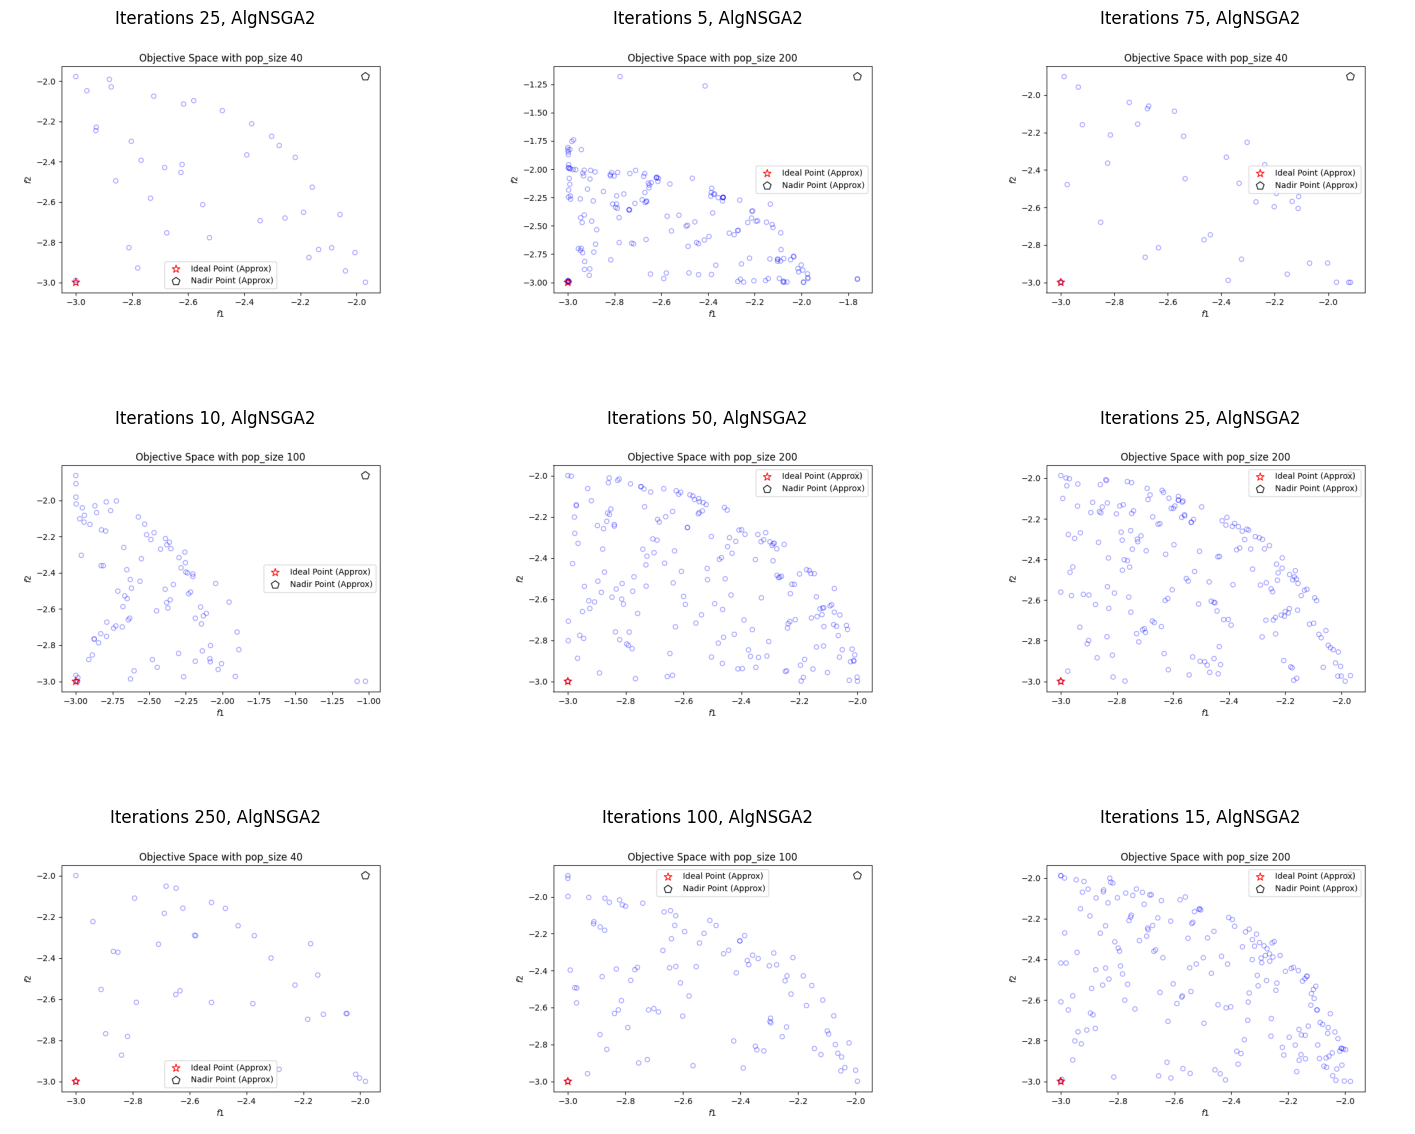

In [45]:
folder_2 = os.path.dirname(folder)
folder_2
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = ltdz1['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {ltdz1.Iteration[i]}, Alg{ltdz1.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

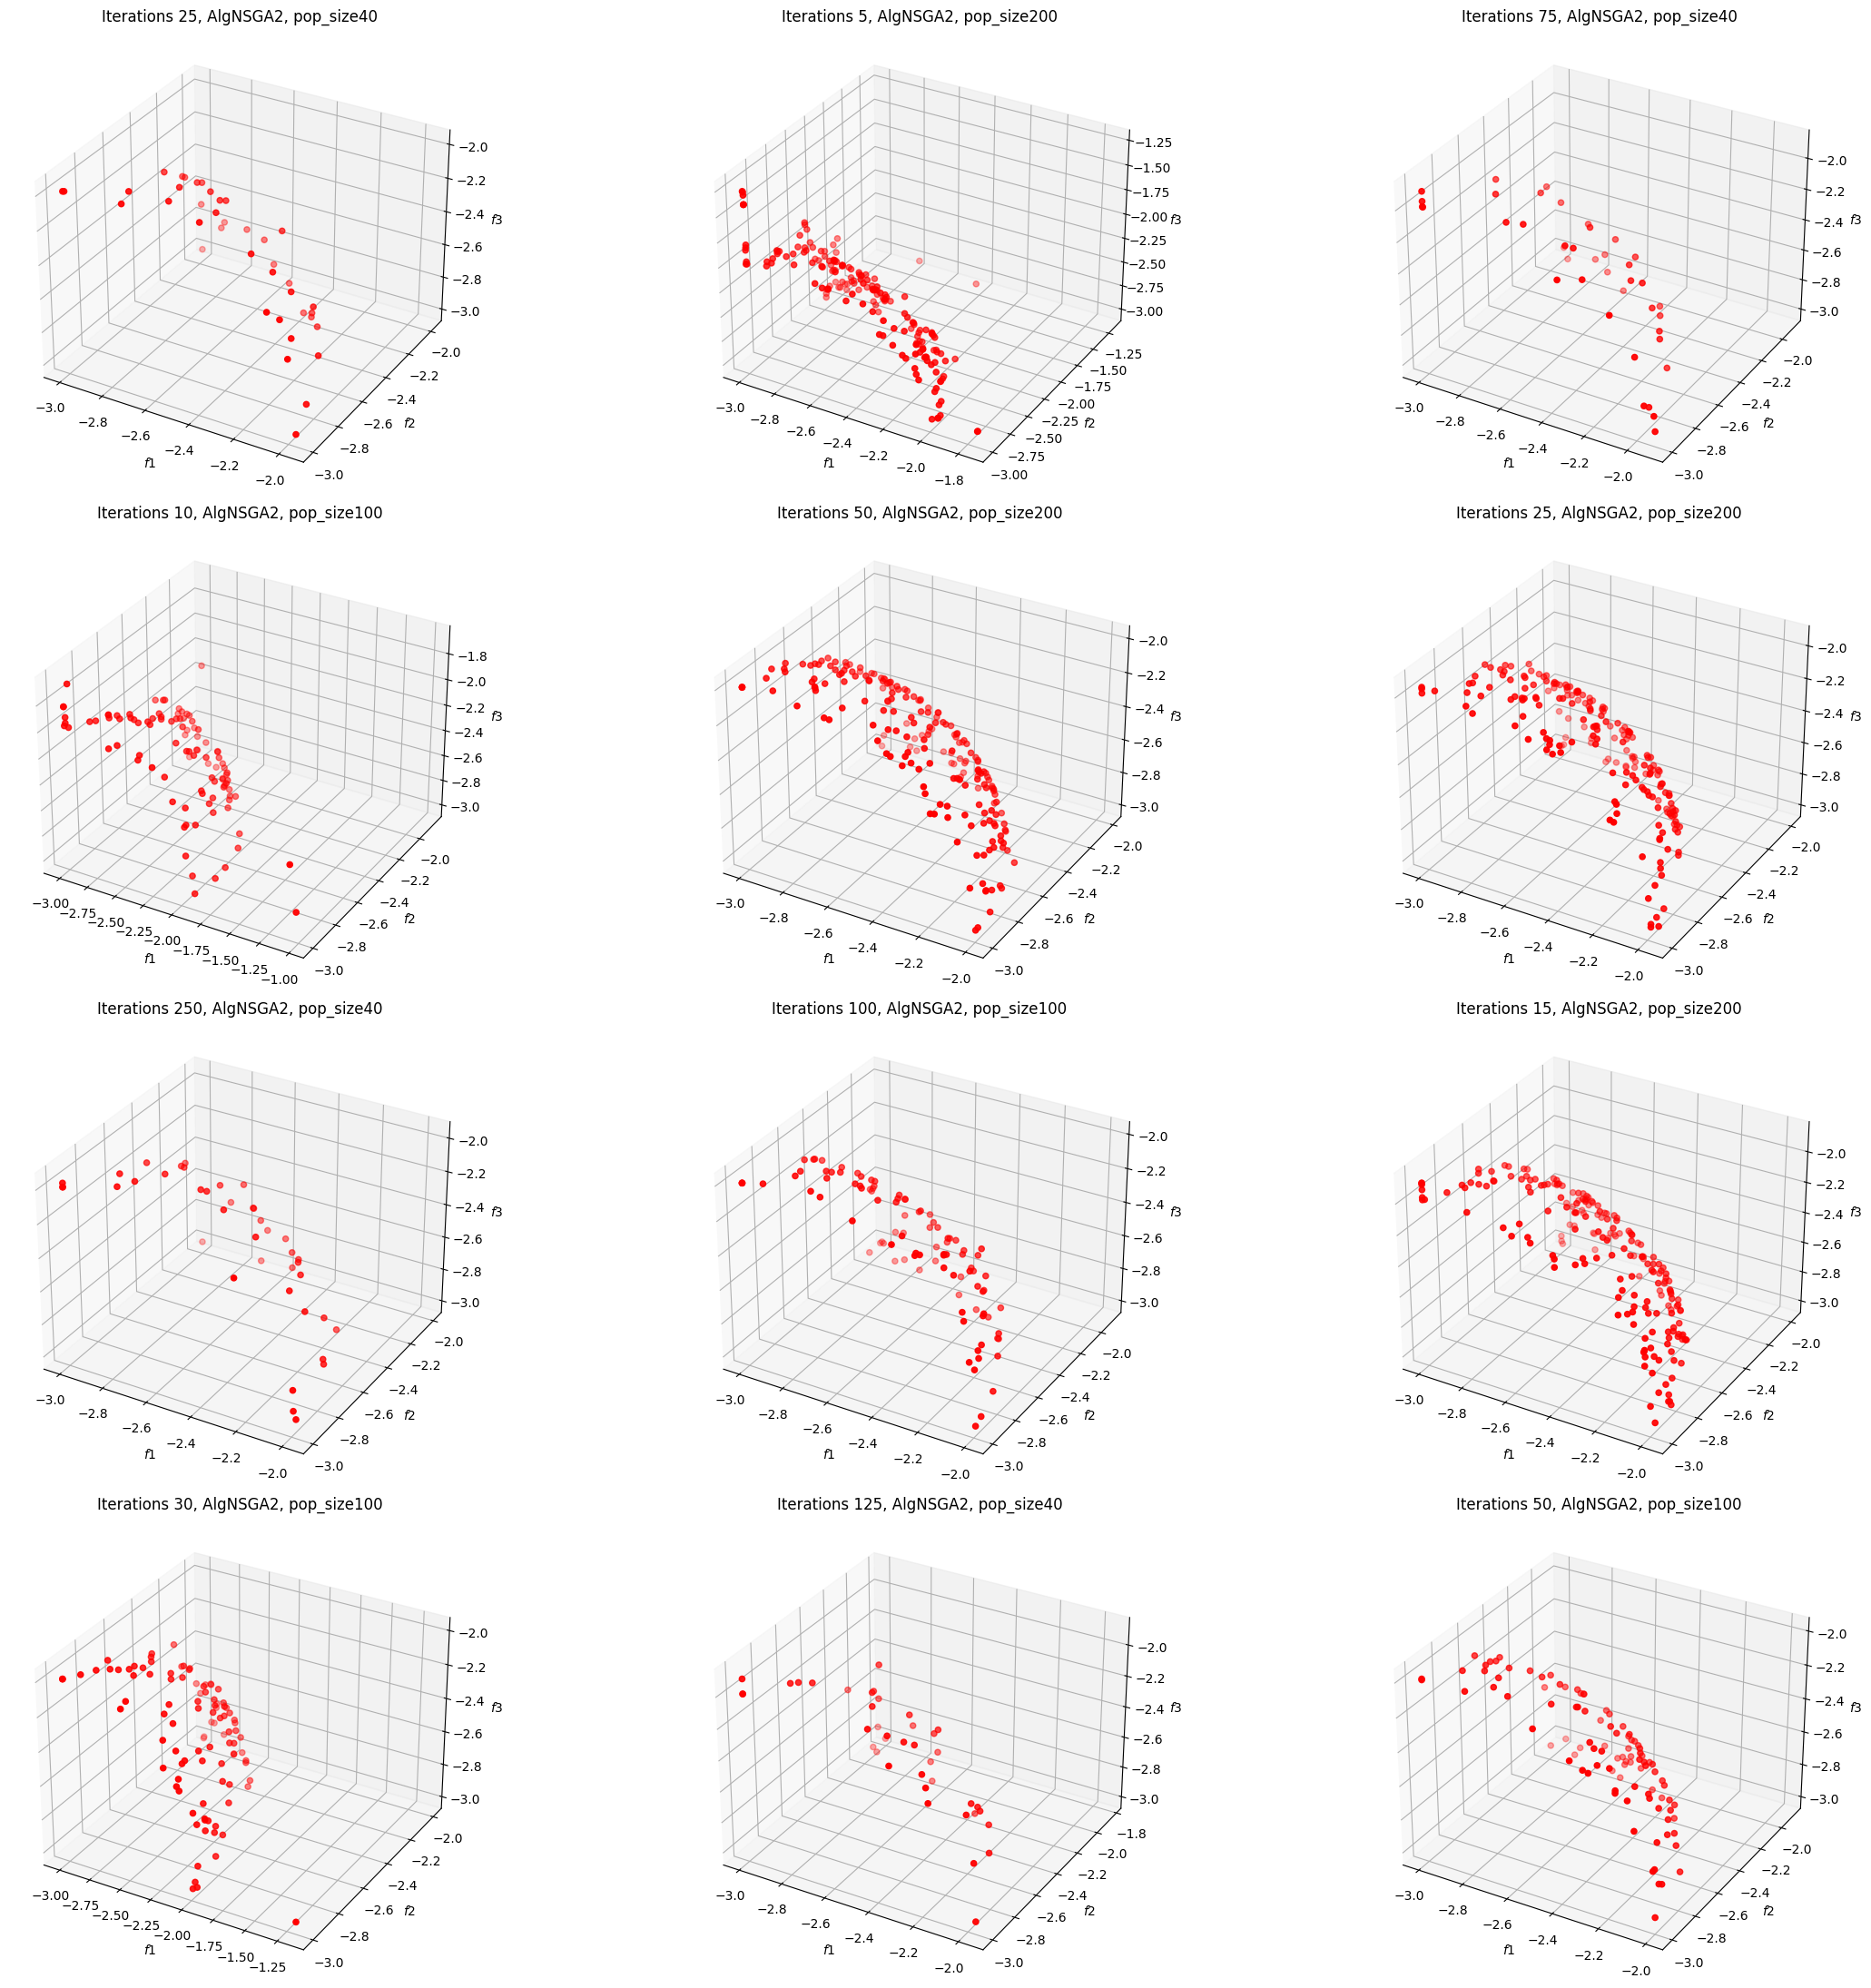

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(28,22), dpi=100)
for i in range(12):
    f = ltdz1['path'][i]
    path = os.path.join(folder_2,f )
    F = np.loadtxt(path)
    ax = fig.add_subplot(4, 3, i+1, projection='3d')
    ax.scatter(F[:,0], F[:,1], F[:,2], c='r', marker='o')
    ax.set_xlabel('$f1$')
    ax.set_ylabel('$f2$')
    ax.set_zlabel('$f3$')
    ax.set_title(f'Iterations {ltdz1.Iteration[i]}, Alg{ltdz1.Alg_name[i]}, pop_size{ltdz1.pop_size[i]}')
    plt.tight_layout()

In [47]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(ltdz1['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-1.76, -1.76, -1.91])
pf = np.loadtxt(os.path.join(cdir, 'Bench/ltdz1_pf' ))
ltdz1_table_1 = hv_result(ltdz1)

Global nadir point for kur1 with two variables is :[-1.02 -1.18 -1.04]
ref_point is [-1.76 -1.76 -1.91]


In [48]:
ref_point = np.array([5, 5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/ltdz1_pf' ))
ltdz1_table_2= hv_result(ltdz1)

ref_point is [5 5 5]


In [49]:
pd.concat([ltdz1_table_1,ltdz1_table_2]).to_excel('Excel/ltdz1.xlsx', engine = 'xlsxwriter')

## LTDZ1 reference 0,0,0. Also compute IDG with respect to the front attached  zdt10_9p.txt

In [50]:
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt10_9P' ))
print(pf.shape)

(60, 3)


Text(0.5, 0.92, 'Paretofront')

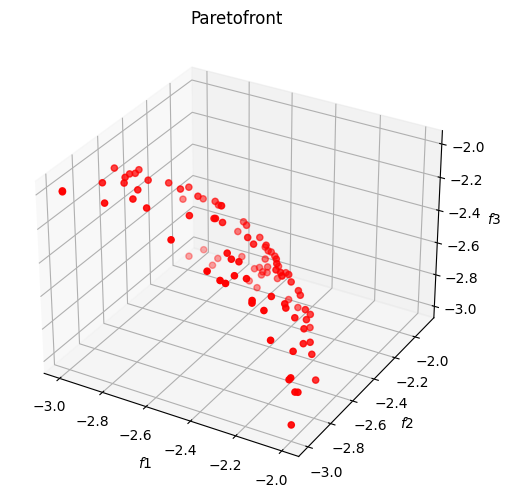

In [51]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(F[:,0], F[:,1], F[:,2], c='r', marker='o')
ax.set_xlabel('$f1$')
ax.set_ylabel('$f2$')
ax.set_zlabel('$f3$')
ax.set_title(f'Paretofront')

In [52]:
ref_point = np.array([0, 0, 0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt10_9P' ))
ltdz1_zdt10_9P = hv_result(ltdz1)

ref_point is [0 0 0]


In [53]:
ltdz1_zdt10_9P.to_excel('Excel/ltdz1_zdt10_9P.xlsx', engine = 'xlsxwriter')